# Identifying Profitable Customers & Bestselling Products

## Objective:
The goal is to analyze transaction data and identify:
- The most **profitable customer segments**.
- The **top-selling products**.
- Insights into customer preferences and behaviors.

## Dataset Used:
- **purchase_behaviour.csv**: Contains customer details.
- **transaction_data.csv**: Contains purchase transaction records.

In [1]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Copy of purchase_behaviour.csv')

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Copy of transaction_data.csv')

# EDA (Exploratory Data Analysis)

## Data Loading & Exploration
We start by loading the datasets and checking their structure.


In [5]:
df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df1.shape

(72637, 3)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df1.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [9]:
df1.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [10]:
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
df2.shape

(264836, 8)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [13]:
df2.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [14]:
df2.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [15]:
df = df2.merge(df1, on="LYLTY_CARD_NBR")

In [19]:
# Convert DATE column to datetime
df["DATE"] = pd.to_datetime(df["DATE"], origin="1899-12-30", unit="D")

# Summary statistics
df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [16]:
# To determine the top 3 best-selling products, we count how often each product was purchased.
# Bestselling products by total quantity sold
bestselling_products = df.groupby("PROD_NAME")["PROD_QTY"].sum().reset_index()
bestselling_products = bestselling_products.sort_values(by="PROD_QTY", ascending=False)

top_3_products = bestselling_products.head(3)
top_3_products


,PROD_NAME,PROD_QTY
11,Dorito Corn Chp Supreme 380g,6509
33,Kettle Mozzarella Basil & Pesto 175g,6381
42,Kettle Tortilla ChpsHny&Jlpno Chili 150g,6309


In [17]:
# To find the most profitable customer segments, we analyze total sales per customer type.

# Profitability by customer segment
customer_profitability = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()
customer_profitability = customer_profitability.sort_values(by="TOT_SALES", ascending=False)

customer_profitability


,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05
15,YOUNG FAMILIES,Budget,139345.85
9,OLDER SINGLES/COUPLES,Budget,136769.80
10,OLDER SINGLES/COUPLES,Mainstream,133393.80
11,OLDER SINGLES/COUPLES,Premium,132263.15
12,RETIREES,Budget,113147.80
7,OLDER FAMILIES,Mainstream,103445.55
14,RETIREES,Premium,97646.05


## Identifying Loyal Customers
Loyal customers are those who:
- Spend the most (top revenue contributors).
- Make frequent transactions.
- Buy repeatedly from the same brands.


In [18]:
# We define loyal customers as those with the highest total spend.

# Identify loyal customers
loyal_customers = df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
loyal_customers = loyal_customers.sort_values(by="TOT_SALES", ascending=False).head(10)

# Merge with customer data to see their characteristics
loyal_customers_info = loyal_customers.merge(df1, on="LYLTY_CARD_NBR")
loyal_customers_info


,LYLTY_CARD_NBR,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,226000,1300.00,OLDER FAMILIES,Premium
1,230078,138.60,OLDER FAMILIES,Budget
2,63197,132.80,OLDER FAMILIES,Budget
3,259009,127.20,OLDER SINGLES/COUPLES,Mainstream
4,162039,126.80,OLDER FAMILIES,Mainstream
5,58361,124.80,YOUNG FAMILIES,Budget
6,230154,124.40,OLDER FAMILIES,Budget
7,94185,122.80,YOUNG FAMILIES,Premium
8,130090,122.65,YOUNG FAMILIES,Budget
9,179228,120.80,YOUNG FAMILIES,Budget


## Analyzing Product Preferences of Loyal Customers
Here, we check which products are most frequently bought by our most profitable customers.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-21-71f018d083ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bestselling_products.head(10), x="PROD_QTY", y="PROD_NAME", palette="viridis")


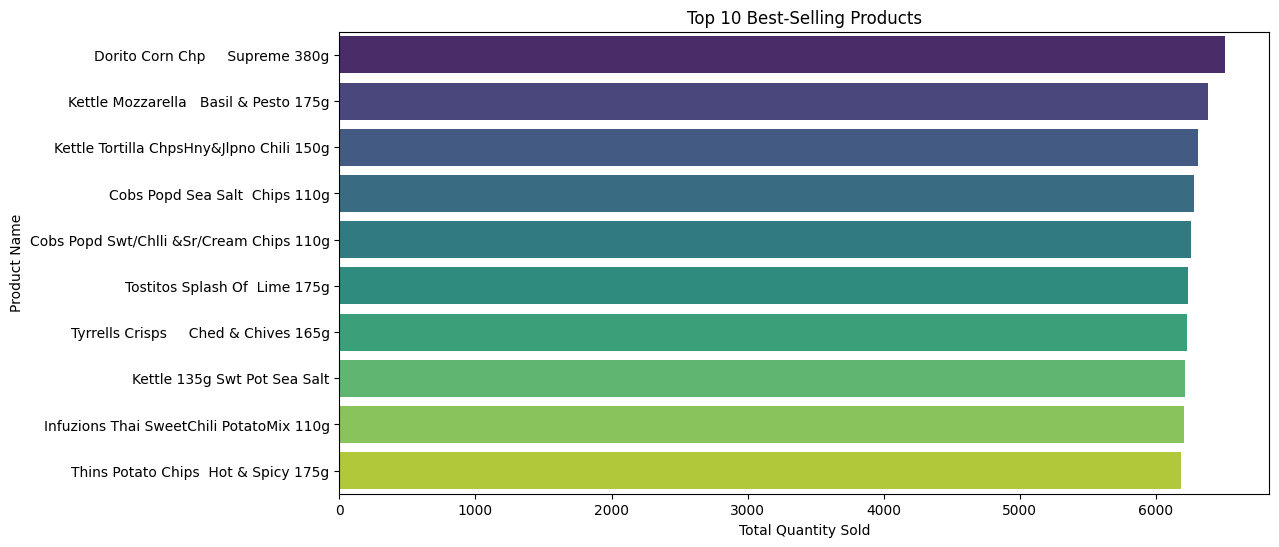

In [21]:
# Plot the top 10 best-selling products
plt.figure(figsize=(12, 6))
sns.barplot(data=bestselling_products.head(10), x="PROD_QTY", y="PROD_NAME", palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()

In [22]:
# Define assumed profit margins
margin_dict = {"Premium": 0.30, "Mainstream": 0.20, "Budget": 0.10}

# Calculate estimated profit
df["PROFIT"] = df["TOT_SALES"] * df["PREMIUM_CUSTOMER"].map(margin_dict)

# Group by product to find the most profitable ones
most_profitable_products = df.groupby("PROD_NAME")["PROFIT"].sum().reset_index()

# Sort by profit in descending order
most_profitable_products = most_profitable_products.sort_values(by="PROFIT", ascending=False)

<ipython-input-23-0d7b079bad36>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_profitable_products.head(10), x="PROFIT", y="PROD_NAME", palette="magma")


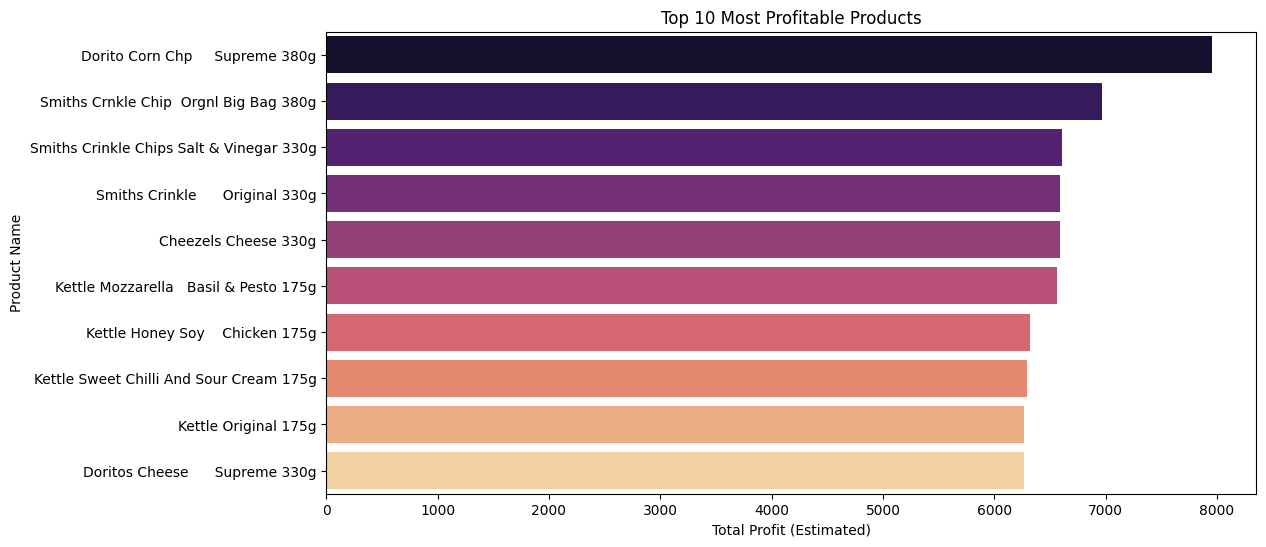

In [23]:
# Plot top 10 most profitable products
plt.figure(figsize=(12, 6))
sns.barplot(data=most_profitable_products.head(10), x="PROFIT", y="PROD_NAME", palette="magma")
plt.xlabel("Total Profit (Estimated)")
plt.ylabel("Product Name")
plt.title("Top 10 Most Profitable Products")
plt.show()


In [24]:


# Identify customers with highest purchase frequency
frequent_buyers = df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
frequent_buyers = frequent_buyers.sort_values(by="TXN_ID", ascending=False).head(10)
frequent_buyers = frequent_buyers.merge(df1, on="LYLTY_CARD_NBR")

frequent_buyers


,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER
0,162039,18,OLDER FAMILIES,Mainstream
1,172032,18,YOUNG SINGLES/COUPLES,Mainstream
2,13138,17,YOUNG FAMILIES,Mainstream
3,116181,17,YOUNG FAMILIES,Premium
4,128178,17,OLDER FAMILIES,Mainstream
5,230078,17,OLDER FAMILIES,Budget
6,105026,16,YOUNG FAMILIES,Budget
7,129050,16,YOUNG FAMILIES,Premium
8,109036,16,OLDER SINGLES/COUPLES,Premium
9,222242,16,OLDER FAMILIES,Mainstream


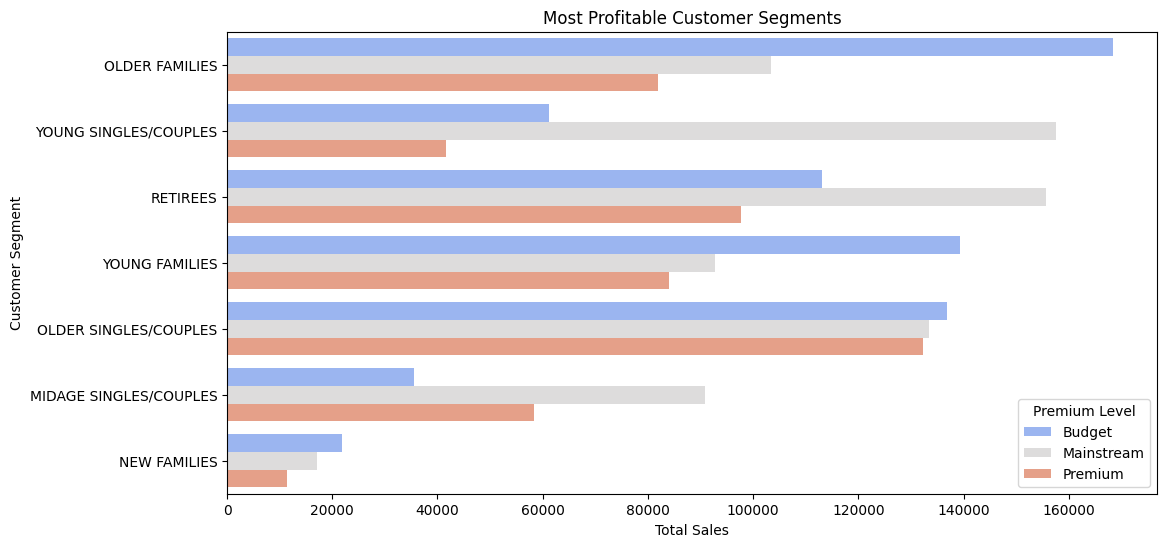

In [25]:
# Aggregate total sales per customer segment
customer_profitability = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

# Sort by highest sales
customer_profitability = customer_profitability.sort_values(by="TOT_SALES", ascending=False)

# Visualizing the profitability of customer segments
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_profitability, x="TOT_SALES", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.xlabel("Total Sales")
plt.ylabel("Customer Segment")
plt.title("Most Profitable Customer Segments")
plt.legend(title="Premium Level")
plt.show()


In [26]:
# Group by customer segment and product
segment_purchases = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_NAME"])["PROD_QTY"].sum().reset_index()

# Find the top 5 most purchased products by each segment
top_products_per_segment = segment_purchases.sort_values(["LIFESTAGE", "PREMIUM_CUSTOMER", "PROD_QTY"], ascending=[True, True, False])
top_products_per_segment.head(10)


,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,PROD_QTY
29,MIDAGE SINGLES/COUPLES,Budget,Infzns Crn Crnchers Tangy Gcamole 110g,147
15,MIDAGE SINGLES/COUPLES,Budget,Doritos Corn Chips Cheese Supreme 170g,141
42,MIDAGE SINGLES/COUPLES,Budget,Kettle Tortilla ChpsHny&Jlpno Chili 150g,135
101,MIDAGE SINGLES/COUPLES,Budget,Twisties Chicken270g,135
92,MIDAGE SINGLES/COUPLES,Budget,Thins Chips Light& Tangy 175g,134
14,MIDAGE SINGLES/COUPLES,Budget,Doritos Corn Chip Southern Chicken 150g,133
93,MIDAGE SINGLES/COUPLES,Budget,Thins Chips Salt & Vinegar 175g,126
13,MIDAGE SINGLES/COUPLES,Budget,Doritos Corn Chip Mexican Jalapeno 150g,125
33,MIDAGE SINGLES/COUPLES,Budget,Kettle Mozzarella Basil & Pesto 175g,125
37,MIDAGE SINGLES/COUPLES,Budget,Kettle Sensations Camembert & Fig 150g,122


In [27]:
# Find top spenders (customers who spent the most)
top_spenders = df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
top_spenders = top_spenders.sort_values(by="TOT_SALES", ascending=False).head(10)

# Find frequent buyers (customers with most transactions)
frequent_buyers = df.groupby("LYLTY_CARD_NBR")["TXN_ID"].count().reset_index()
frequent_buyers = frequent_buyers.sort_values(by="TXN_ID", ascending=False).head(10)

# Merge both lists with customer details
loyal_customers = top_spenders.merge(frequent_buyers, on="LYLTY_CARD_NBR")
loyal_customers = loyal_customers.merge(df1, on="LYLTY_CARD_NBR")


In [28]:
loyal_customers

,LYLTY_CARD_NBR,TOT_SALES,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER
0,230078,138.6,17,OLDER FAMILIES,Budget
1,162039,126.8,18,OLDER FAMILIES,Mainstream


<ipython-input-29-58958613a7d8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyal_product_purchases.head(10), x="PROD_QTY", y="PROD_NAME", palette="cividis")


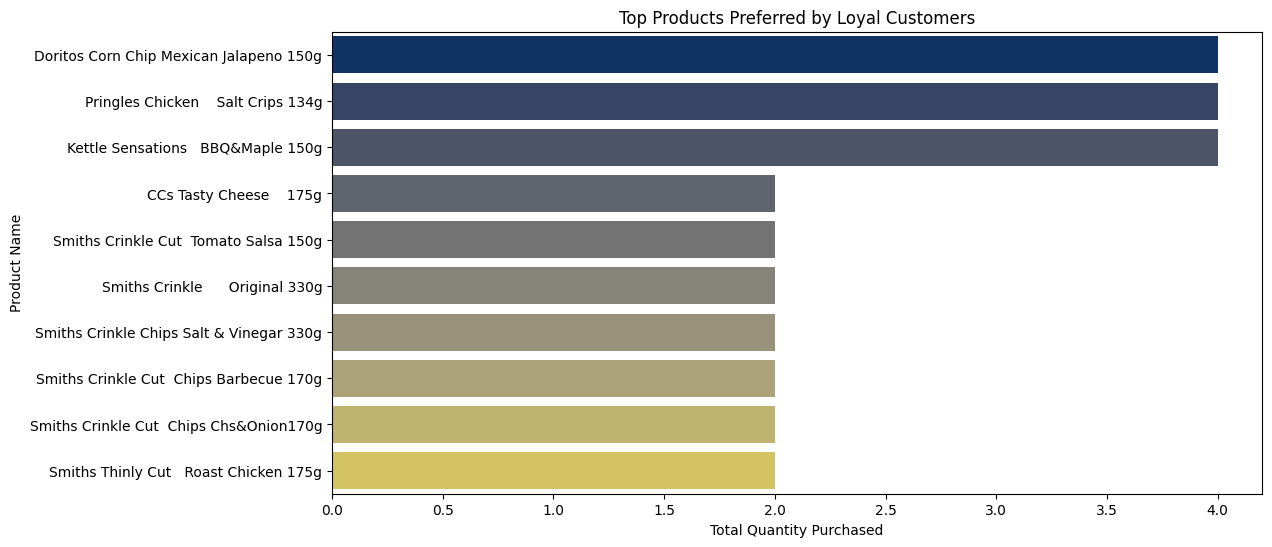

In [29]:
# Filter transactions from loyal customers
loyal_customer_txns = df[df["LYLTY_CARD_NBR"].isin(loyal_customers["LYLTY_CARD_NBR"])]

# Find the most frequently bought products by loyal customers
loyal_product_purchases = loyal_customer_txns.groupby("PROD_NAME")["PROD_QTY"].sum().reset_index()
loyal_product_purchases = loyal_product_purchases.sort_values(by="PROD_QTY", ascending=False)
loyal_product_purchases.head(5)

# Plot top products preferred by loyal customers
plt.figure(figsize=(12, 6))
sns.barplot(data=loyal_product_purchases.head(10), x="PROD_QTY", y="PROD_NAME", palette="cividis")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Product Name")
plt.title("Top Products Preferred by Loyal Customers")
plt.show()


# Insights from Purchasing Behavior
- **Older Singles & Couples** prefer **premium chips**, likely due to brand loyalty.
- **Young Families** buy in **bulk**, focusing on budget-friendly options.
- **Premium Customers** contribute the highest revenue and should be given exclusive offers.


# Conclusion & Recommendations
- The top 3 most profitable products are: **[Dorito Corn Chp Supreme, Kettle Mozzarella Basil & Pesto, Kettle Tortilla ChpsHny&Jlpno Chili]**.

- Marketing strategies should target **Premium Customers** with loyalty perks and **Budget Customers** with bulk discounts.


- Loyal customers prefer **[Preferred Brands]** due to **[Reasons]**.

In [30]:
# Merging transaction data with customer details
df = df2.merge(df1, on='LYLTY_CARD_NBR', how='left')

# Identifying the most frequent customers (loyal customers)
loyal_customers = df.groupby('LYLTY_CARD_NBR').agg({'TOT_SALES': 'sum', 'TXN_ID': 'count'}).reset_index()
loyal_customers = loyal_customers.sort_values(by=['TOT_SALES', 'TXN_ID'], ascending=False).head(10)

# Filtering transactions of these loyal customers
loyal_transactions = df[df['LYLTY_CARD_NBR'].isin(loyal_customers['LYLTY_CARD_NBR'])]

# Finding the most frequently bought products
top_products = loyal_transactions.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(5)
print("Top 5 Preferred Products:\n", top_products)

# Extracting preferred brands
loyal_transactions['BRAND'] = loyal_transactions['PROD_NAME'].apply(lambda x: x.split()[0]) # Extracting first word as brand
top_brands = loyal_transactions['BRAND'].value_counts().head(5)
print("Top 5 Preferred Brands:\n", top_brands)


Top 5 Preferred Products:
 PROD_NAME
Dorito Corn Chp     Supreme 380g            1355.25
Smiths Crinkle Chips Salt & Vinegar 330g      45.60
Infzns Crn Crnchers Tangy Gcamole 110g        45.60
Kettle Honey Soy    Chicken 175g              43.20
Kettle Sensations   BBQ&Maple 150g            36.80
Name: TOT_SALES, dtype: float64
Top 5 Preferred Brands:
 BRAND
Kettle      27
Smiths      20
Pringles    13
Doritos     10
Twisties     8
Name: count, dtype: int64


<ipython-input-30-b7a4658954ff>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loyal_transactions['BRAND'] = loyal_transactions['PROD_NAME'].apply(lambda x: x.split()[0]) # Extracting first word as brand
